In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# This is an exploratory data analysis of US apartment rent from Jamuary 2017 to September 2020.
# It includes rent from different sized apartments in hundreds of US cities and most US states. 
# I will look to answer different questions such as:
#
# - How has rent changed over time?
# - How does rent vary by state? 
# - How does the price of living alone compare to living with roommates?
#
# Data taken from Apartment List (https://www.apartmentlist.com/research/category/data-rent-estimates)
#
# Mark Aguila

In [5]:
rent = pd.read_csv('Rent/Apartment_List_Rent_Data_-_City_2020-9.csv')

In [6]:
# The data set has thousands of rows and over one hundred thousand data points.
# It is far to large to display here in its entirety.

print('Number of unique locations:', len(rent['Location'].unique()))
print('Number of rows:', len(rent))
print('Number of data  points:', rent.size)

Number of unique locations: 540
Number of rows: 2700
Number of data  points: 132300


In [7]:
# This is a small preview into the data set.
# This selects a random sample of 10 rows from the data.
# Re-run this cell using "SHIFT + ENTER" to select a new random sample. 

rent.sample(10)

,Location,Location_Type,State,Bedroom_Size,Price_2017_01,Price_2017_02,Price_2017_03,Price_2017_04,Price_2017_05,Price_2017_06,...,Price_2019_12,Price_2020_01,Price_2020_02,Price_2020_03,Price_2020_04,Price_2020_05,Price_2020_06,Price_2020_07,Price_2020_08,Price_2020_09
1626,"Rock Hill, SC",City,SC,1br,NaN,NaN,NaN,NaN,NaN,942.0,...,1008.0,1011.0,1022.0,1033.0,1037.0,1022.0,1010.0,1010.0,1027.0,1036
2351,"Newark, DE",City,DE,1br,NaN,NaN,NaN,NaN,NaN,1180.0,...,1142.0,1154.0,1149.0,1150.0,1146.0,1160.0,1151.0,1163.0,1168.0,1172
191,"Virginia Beach, VA",City,VA,1br,1080.0,1068.0,1070.0,1071.0,1086.0,1099.0,...,1132.0,1139.0,1145.0,1153.0,1153.0,1147.0,1153.0,1171.0,1195.0,1210
2323,"Mooresville, NC",City,NC,3br,NaN,NaN,NaN,NaN,1338.0,1330.0,...,1440.0,1441.0,1460.0,1460.0,1464.0,1454.0,1461.0,1474.0,1479.0,1497
8,"Los Angeles, CA",City,CA,3br,2478.0,2492.0,2507.0,2477.0,2481.0,2482.0,...,2570.0,2563.0,2567.0,2566.0,2545.0,2506.0,2472.0,2450.0,2433.0,2407
725,"Pasadena, TX",City,TX,Studio,NaN,707.0,NaN,713.0,705.0,698.0,...,738.0,737.0,737.0,737.0,735.0,735.0,736.0,745.0,749.0,749
2009,"West New York, NJ",City,NJ,4br,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2423.0,2410.0,2415.0,2428.0,2417.0,2377.0,2337.0,2334.0,2369
987,"Manchester, NH",City,NH,2br,NaN,NaN,NaN,NaN,1125.0,1145.0,...,NaN,1263.0,1254.0,1252.0,1261.0,1283.0,1290.0,1306.0,1326.0,1335
976,"Midland, TX",City,TX,1br,705.0,735.0,738.0,765.0,795.0,824.0,...,1007.0,986.0,967.0,941.0,919.0,879.0,844.0,796.0,769.0,746
732,"Torrance, CA",City,CA,2br,NaN,NaN,NaN,NaN,NaN,NaN,...,2283.0,2295.0,2314.0,NaN,2319.0,2276.0,2241.0,2212.0,2240.0,2241


In [8]:
# Data Cleaning
# Notice entries listed as NaN.
# These NOT A NUMBER (NaN) entries mean
# the data set is missing entries.

rent.loc[:,['Location','Price_2017_01']]

,Location,Price_2017_01
0,"New York, NY",1711.0
1,"New York, NY",1808.0
2,"New York, NY",1903.0
3,"New York, NY",2171.0
4,"New York, NY",2276.0
...,...,...
2695,"Brookhaven, GA",NaN
2696,"Peachtree Corners, GA",NaN
2697,"Brookhaven, GA",NaN
2698,"Brookhaven, GA",NaN


In [9]:
# Here is a breakdown of how many rent values are 
# missing for each month from 01/2017 to 09/2020.

rent.isna().sum()[4:]

Price_2017_01    1705
Price_2017_02    1525
Price_2017_03    1310
Price_2017_04    1225
Price_2017_05     590
Price_2017_06     565
Price_2017_07     585
Price_2017_08     620
Price_2017_09     655
Price_2017_10     780
Price_2017_11     695
Price_2017_12     800
Price_2018_01     605
Price_2018_02     480
Price_2018_03     245
Price_2018_04     355
Price_2018_05     205
Price_2018_06     160
Price_2018_07     150
Price_2018_08     190
Price_2018_09     325
Price_2018_10     220
Price_2018_11     390
Price_2018_12     385
Price_2019_01     100
Price_2019_02     125
Price_2019_03      90
Price_2019_04      35
Price_2019_05      70
Price_2019_06      55
Price_2019_07      35
Price_2019_08      75
Price_2019_09     125
Price_2019_10     140
Price_2019_11     310
Price_2019_12     250
Price_2020_01     115
Price_2020_02     190
Price_2020_03     115
Price_2020_04     120
Price_2020_05      65
Price_2020_06      50
Price_2020_07      50
Price_2020_08      25
Price_2020_09       0
dtype: int

In [10]:
# I will remove NaN entries to work with complete rent information.

rent = rent.dropna(how='all', thresh = 0)#.sample(10)
len(rent['Location'].unique())
#rent[rent['Location'] == 'Brookhaven, GA']

540

In [11]:
# I'll start by plotting average rent over time to see 
# what trends have emerged over the last three years.
avg_rent = rent.mean()
avg_rent.head()

Price_2017_01    1487.884422
Price_2017_02    1479.113191
Price_2017_03    1454.356115
Price_2017_04    1491.169492
Price_2017_05    1504.340758
dtype: float64

Text(0, 0.5, 'Dollars')

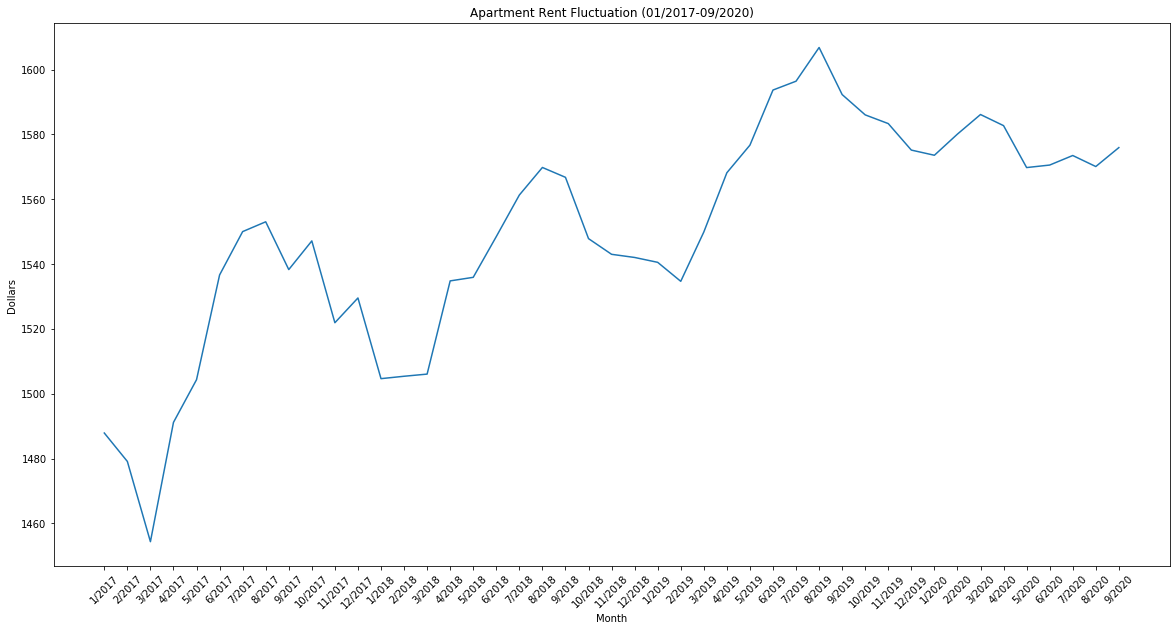

In [12]:
# Labels for months
years = [str(year) for year in range(2017, 2021)]
months = [str(month) for month in range(1, 13)]
dates = [month+'/'+year for year in years for month in months]

# Average rent graph
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=rent.mean())
chart.set_xticklabels(labels = dates, rotation=45, )
chart.set_title('Apartment Rent Fluctuation (01/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

In [13]:
# Rents have seen short terms increases and decreases with a long term rise in prices.
# However, this includes the full rent of all apartment sizes. Many people do not pay
# for a several bedroom apartment alone. 

In [14]:
# The following adjusts for a more accurate look of what a renter might pay
# per month. It divides the average rent of an apartment by how many rooms it has.

studio = rent[rent['Bedroom_Size'] == 'Studio'].mean() 
single = rent[rent['Bedroom_Size'] == '1br'].mean()
double = rent[rent['Bedroom_Size'] == '2br'].mean() / 2
triple = rent[rent['Bedroom_Size'] == '3br'].mean() / 3
quad = rent[rent['Bedroom_Size'] == '4br'].mean() / 4

per_person = pd.concat([studio, single, double, triple, quad], axis=1)
per_person.rename(axis = 1, mapper={0:'Studio', 1:'Single', 2:'Double', 3:'Triple', 4:'Quad'}, inplace = True)
per_person.head()

,Studio,Single,Double,Triple,Quad
Price_2017_01,1096.547739,1176.311558,709.685930,575.934673,504.846734
Price_2017_02,1089.646809,1162.587234,704.757447,571.855319,504.562766
Price_2017_03,1070.597122,1142.410072,691.730216,560.426859,498.508094
Price_2017_04,1105.233898,1166.288136,708.410169,573.734463,511.575424
Price_2017_05,1114.125592,1176.805687,714.702607,581.687204,514.076422


Text(0, 0.5, 'Dollars')

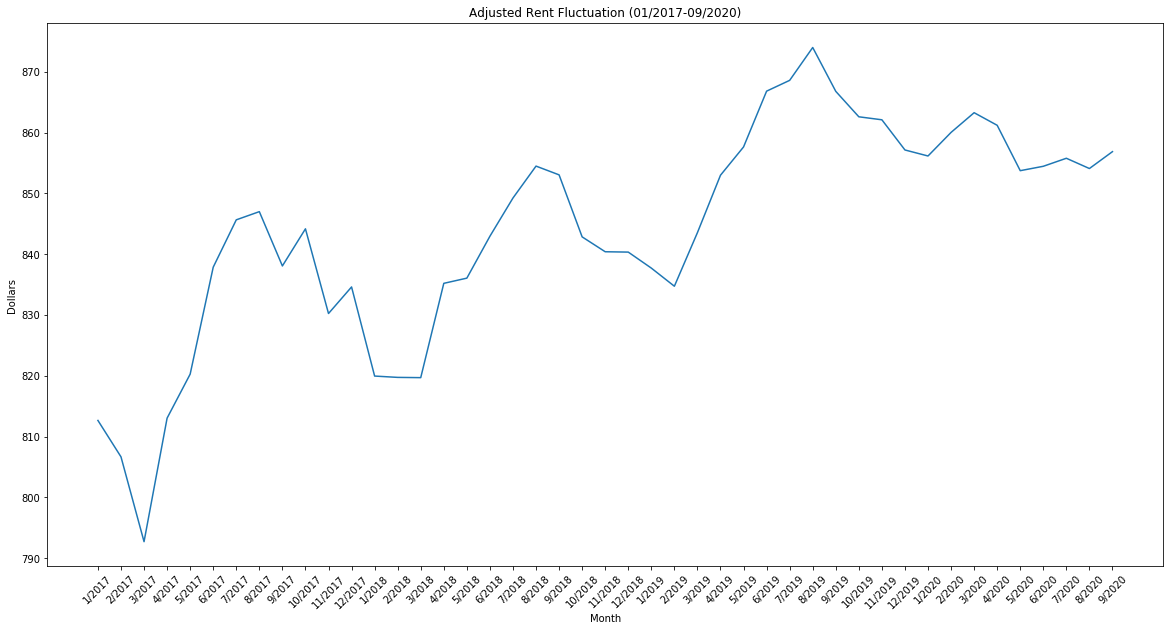

In [15]:
# The following charts changes in rent payments that a renter
# sharing an apartment might pay. It follows the same trend as
# total rent but notice it ranges from around 800 to 900 dollars
# rather than 1450 to 1600 dollars.

dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=per_person.transpose().mean())
chart.set_xticklabels(labels = dates, rotation=45, )
chart.set_title('Adjusted Rent Fluctuation (01/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

Text(0, 0.5, 'Dollars')

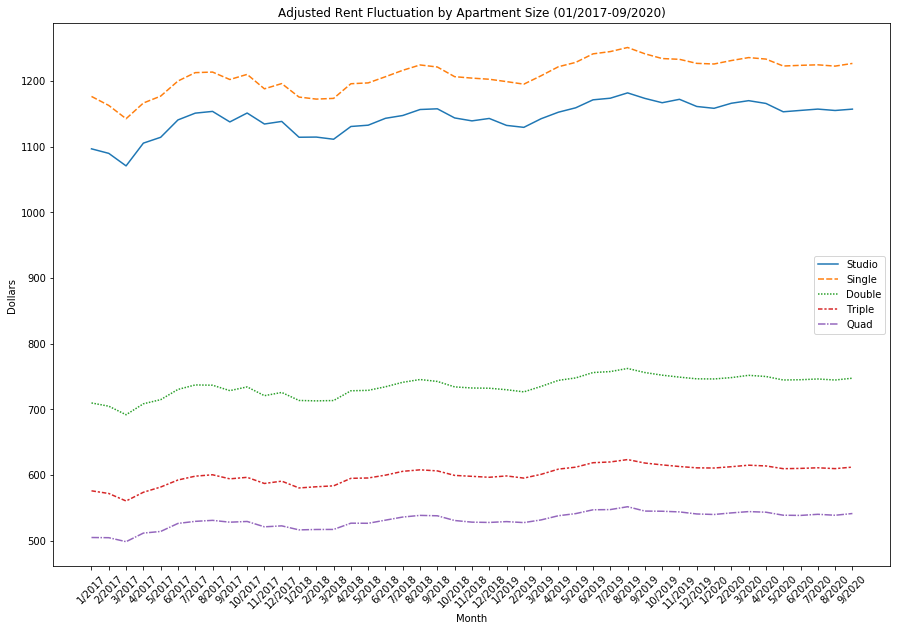

In [16]:
# This graph separates the trends by apartment size. It shows
# adjusted rent to show comparable payments per room since 
# total rent payments for larger apartments would obviously be higher.

dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=per_person)#.set_title('Rent Fluctuation by Apartment Size 01/2017-09/2020')
chart.set_xticklabels(labels = dates, rotation=45, )
chart.set_title('Adjusted Rent Fluctuation by Apartment Size (01/2017-09/2020)')
ax.set_xlabel("Month")
ax.set_ylabel("Dollars")

In [17]:
# Renters with more roommates pay less rents by splitting rent
# among more people. However, it seems an added benefit is that
# larger apartments have seen more stable rent over time.

In [138]:
# Now I'll move on to a geographic analysis of rent.
# I will look at state data which is more complete 
# than individial city data which may be missing rent values.
#
# State rent data sourced from Apartment List 
# (https://www.apartmentlist.com/research/category/data-rent-estimates)
#
# State population data sourced from US Census Bureau 
# (https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html)

state_populations = pd.read_excel('Rent/nst-est2019-02.xlsx')
state_rent = pd.read_csv('Rent/Apartment_List_Rent_Data_-_State_2020-9.csv')

In [139]:
# First 10 rows of state rent data

state_avg = state_rent.groupby('Location').mean()
state_avg.head(10)

,Price_2017_01,Price_2017_02,Price_2017_03,Price_2017_04,Price_2017_05,Price_2017_06,Price_2017_07,Price_2017_08,Price_2017_09,Price_2017_10,...,Price_2019_12,Price_2020_01,Price_2020_02,Price_2020_03,Price_2020_04,Price_2020_05,Price_2020_06,Price_2020_07,Price_2020_08,Price_2020_09
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,819.2,824.0,829.4,829.6,836.0,842.8,848.2,849.0,853.8,853.2,...,904.4,904.4,906.6,909.0,908.2,908.2,911.2,921.6,932.4,939.0
Alaska,1345.6,1323.8,NaN,NaN,1356.4,1366.0,NaN,1354.4,1330.2,1330.6,...,1359.6,1379.2,1377.0,1390.4,1388.8,1402.2,1396.4,1393.8,1406.6,1414.4
Arizona,1029.8,1023.8,1031.6,1035.0,1040.0,1047.8,1052.0,1053.4,1054.0,1053.6,...,1207.8,1213.0,1218.2,1223.2,1215.8,1204.6,1199.2,1210.4,1226.6,1238.4
Arkansas,761.2,763.6,764.8,765.4,763.8,759.6,750.8,744.6,739.4,737.2,...,769.4,770.8,770.6,772.8,774.2,780.8,787.8,793.6,794.4,795.8
California,1761.4,1775.4,1781.0,1780.8,1795.0,1808.8,1818.8,1820.4,1819.4,1804.8,...,1884.8,1887.6,1896.4,1904.8,1893.4,1873.8,1856.0,1851.4,1842.0,1825.6
Colorado,1343.0,1347.2,1368.8,1372.8,1399.0,1415.0,1425.6,1423.6,1417.2,1405.2,...,1463.4,1461.4,1465.6,1474.6,1470.6,1464.8,1456.8,1460.8,1464.4,1464.2
Connecticut,1278.2,1292.4,1301.0,1314.0,1322.2,1330.8,1330.6,1330.6,1322.2,1318.4,...,1349.6,1344.2,1349.4,1360.4,1368.2,1367.2,1367.0,1368.4,1381.0,1385.6
Delaware,NaN,NaN,1148.8,NaN,1201.4,1211.6,1197.2,1194.8,1195.6,1205.6,...,1283.0,1288.0,1293.2,1307.2,1306.4,1323.6,1333.0,1365.6,1381.8,1387.8
District of Columbia,2066.4,2071.4,2070.8,2083.8,2092.4,2107.8,2119.6,2123.4,2116.2,2095.4,...,2136.0,2131.6,2142.2,2158.8,2149.2,2128.2,2097.6,2075.6,2039.8,1984.8


In [20]:
# First 10 rows of state population data

new_names = {'Unnamed: 1':'April 1, 2010', 'Unnamed: 2': 'July 1, 2019', 'table with row headers in column A and column headers in rows 3 through 5. (leading dots indicate sub-parts)': 'Region'}
state_pop = state_populations.rename(new_names, axis=1)
#state_pop.index = state_pop['Region']
#state_pop['Region'] = state_pop['Region'].str.replace(r'\.', '')
state_pop.index = state_pop['Region'].str.replace(r'\.', '')
state_pop = state_pop.loc['Alabama':'Wyoming', 'April 1, 2010':'July 1, 2019']
state_pop.head(10)

,"April 1, 2010","July 1, 2019"
Region,,
Alabama,4780125,4903185
Alaska,710249,731545
Arizona,6392288,7278717
Arkansas,2916031,3017804
California,37254519,39512223
Colorado,5029319,5758736
Connecticut,3574147,3565287
Delaware,897937,973764
District of Columbia,601767,705749


In [21]:
# A combination of state rent and population data.
# Since rent data is incomplete and population data has not been 
# updated since 2010, I will use July 2019 which has the most 
# complete rent prices and the most recent population estimates.

state_rent_pop = state_avg.merge(state_pop, left_on = state_avg.index, right_on='Region')
labels = {'Price_2019_07':'Rent', 'July 1, 2019':'Population'}
july_2019 = state_rent_pop[['Region', 'Price_2019_07', 'July 1, 2019']]
july_2019 = july_2019.rename(mapper=labels, axis=1).sort_values(by='Population', ascending=False)
july_2019.head(10)

,Region,Rent,Population
4,California,1911.8,39512223
43,Texas,1196.6,28995881
9,Florida,1383.2,21477737
32,New York,1553.2,19453561
38,Pennsylvania,1025.2,12801989
13,Illinois,1143.0,12671821
35,Ohio,855.6,11689100
10,Georgia,1108.6,10617423
33,North Carolina,1077.2,10488084
22,Michigan,975.2,9986857


Correlation: 0.2897572396722222


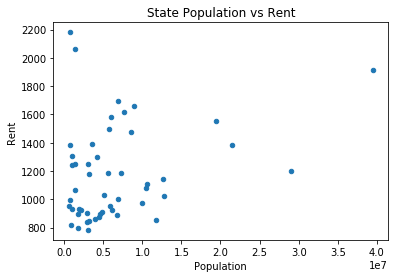

In [22]:
# Plotting state rent against population shows a weak 
# correlation of only about 0.3

cor = july_2019['Rent'].corr(july_2019['Population'].astype('float64'))
print('Correlation:', cor)
july_2019.plot.scatter(x='Population', y='Rent', title='State Population vs Rent')

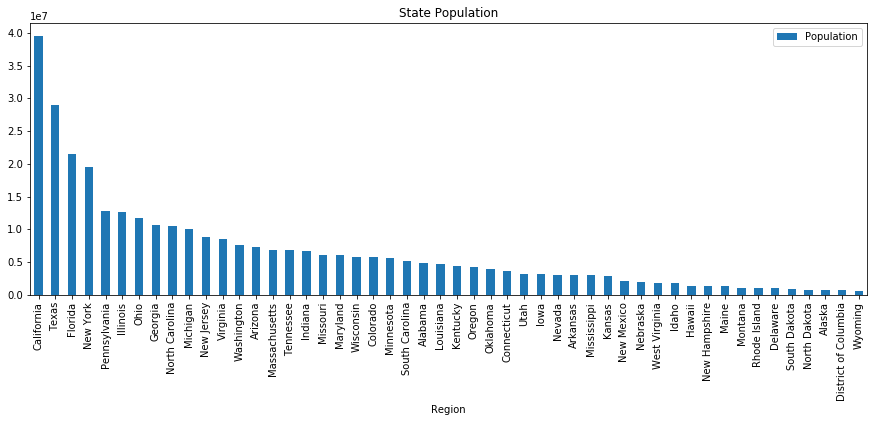

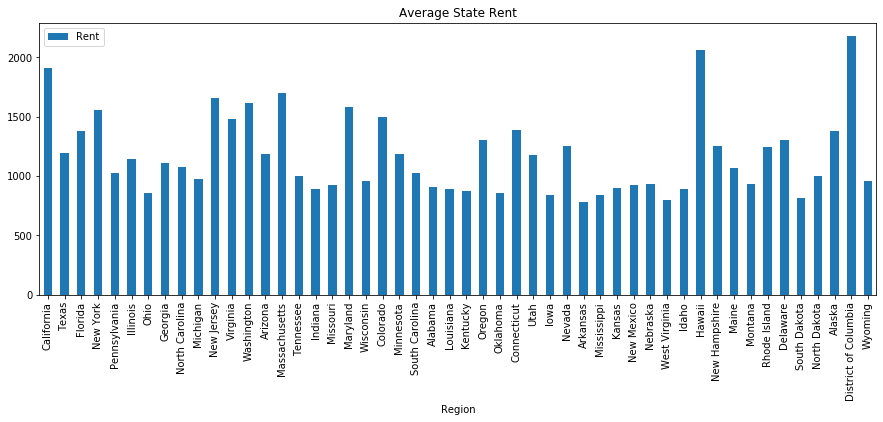

In [23]:
# Demonstrated another way, ranking states by population and then 
# displaying rents in the same order, their is no discernable pattern.

july_2019.plot.bar(x='Region', y='Population', figsize=(15,5), title='State Population')
july_2019.plot.bar(x='Region', y='Rent', figsize=(15,5), title='Average State Rent')

In [125]:
# The previous charts are only a snapshot of national rent
# as they were during July 2019. How has rent changed on
# the scale of individual states from Jan. 2017 to Sep. 2020?

In [126]:
# I'll create a column tracking the difference in rent from
# 01/2017 to 09/2020. 

state_avg.sort_values(by='total_change', ascending=False)[['total_change']]

,total_change
Location,
Nevada,237.0
Arizona,208.6
Hawaii,193.4
Idaho,189.4
Utah,140.0
Washington,138.8
New Mexico,126.6
Colorado,121.2
Alabama,119.8


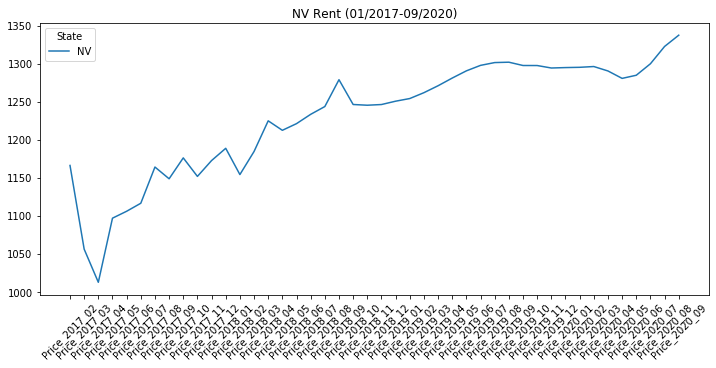

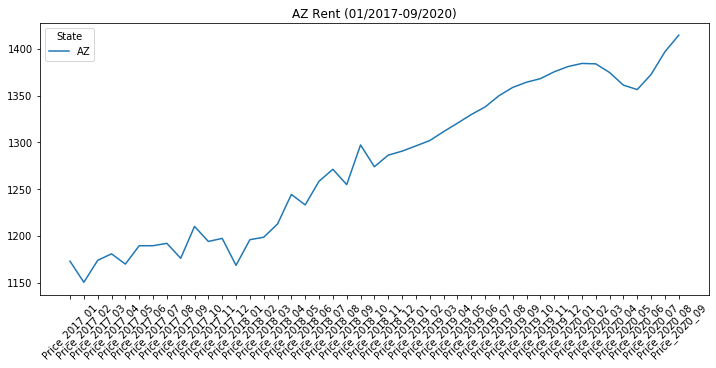

In [128]:
# Nevada and Arizona saw the biggest increases
# over the course of almost  years.

state_avg['total_change'] = state_avg['Price_2020_09'] - state_avg['Price_2017_01']
state_avg.sort_values(by='total_change', ascending=False)[['total_change']].head()
states =  ['NV', 'AZ']
for state in states:
    states_selected = rent[rent['State'].isin([state])]
    state_rents = states_selected.loc[:,:'Price_2020_09'].groupby('State').mean().transpose().dropna()
    dims = (12, 5)
    fig, ax = plt.subplots(figsize=dims)
    chart = sns.lineplot(ax=ax, data=state_rents).set_xticklabels(state_rents.index, rotation=45)
    plt.title(state + ' Rent (01/2017-09/2020)')

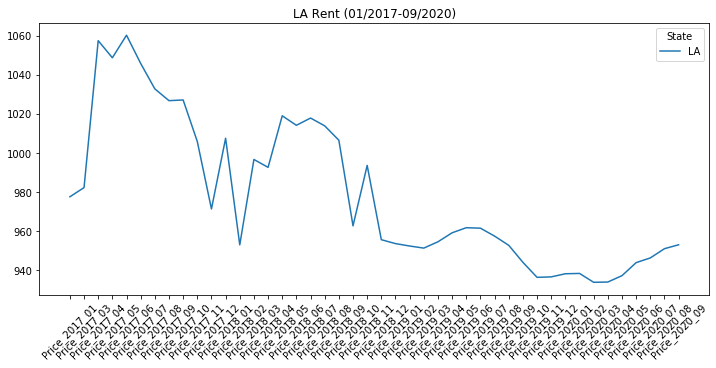

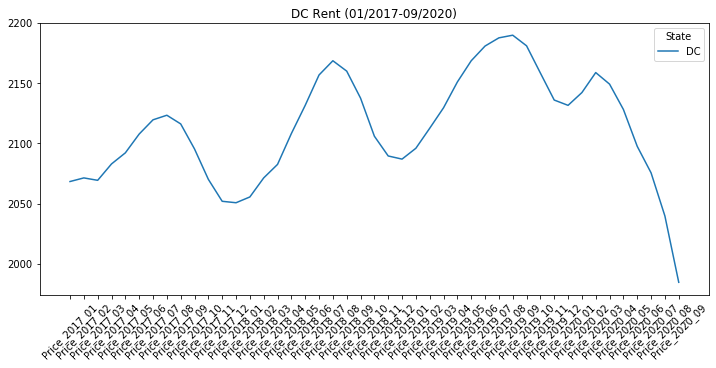

In [122]:
# North Dakota had the smallest increase. Only 2 locations,
# Louisiana and Washington DC, decreased.

states =  ['LA', 'DC']
for state in states:
    states_selected = rent[rent['State'].isin([state])]
    state_rents = states_selected.loc[:,:'Price_2020_09'].groupby('State').mean().transpose().dropna()
    dims = (12, 5)
    fig, ax = plt.subplots(figsize=dims)
    chart = sns.lineplot(ax=ax, data=state_rents).set_xticklabels(state_rents.index, rotation=45)
    plt.title(state+' Rent (01/2017-09/2020)')

In [141]:
# While measuring total change shows which state rents went up
# or down over 3 years, it does not capture the month to month
# or year to year changes. Another useful metric to look at is
# the standard deviation. This will show how volatile or stable
# prices are across the country.

rent_stats = state_avg.dropna().transpose().describe()
rent_stddev = rent_stats.loc['std'].sort_values()
rent_stddev

Location
Iowa                     7.404661
South Dakota            11.498349
Arkansas                15.638140
Texas                   18.290415
Oklahoma                18.459558
Louisiana               19.010504
Kentucky                19.235450
Illinois                20.025366
Tennessee               21.514560
Kansas                  21.574461
Mississippi             21.657608
Missouri                21.922856
South Carolina          22.546484
Wisconsin               23.156263
Nebraska                24.660749
Ohio                    25.133653
Montana                 25.352431
Oregon                  25.471995
Pennsylvania            26.779721
Connecticut             29.209478
Indiana                 29.642145
Michigan                30.207800
North Dakota            30.292612
New Jersey              30.776393
North Carolina          31.227220
Maryland                31.671695
Virginia                31.737960
Georgia                 31.954736
Alabama                 32.218250
Minne

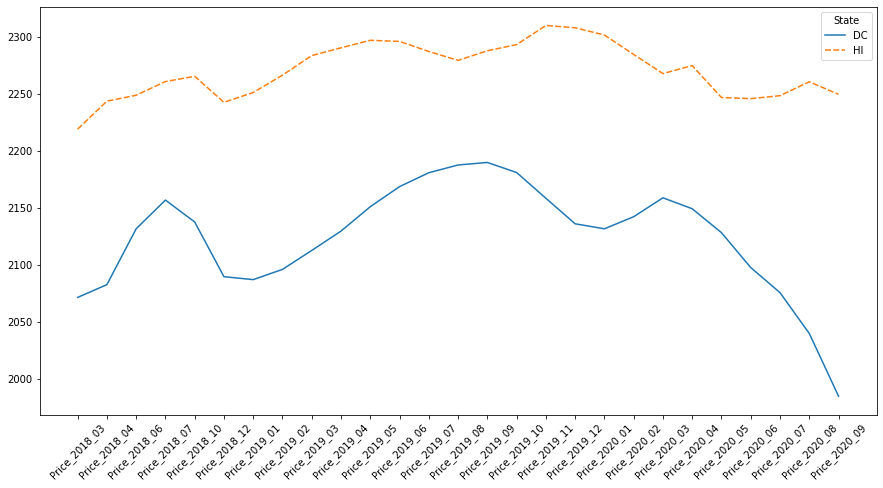

In [145]:
# A look at rent fluctuation in a sample of 10 different states. Most states have maintained relatively stable rates.
# From 2017 to 2020, rent rose or fell a few hundred dollars within each state.
states =  ['HI', 'DC']
states_selected = rent[rent['State'].isin(states)]
state_rents = states_selected.loc[:,:'Price_2020_09'].groupby('State').mean().transpose().dropna()
dims = (15, 7.5)
fig, ax = plt.subplots(figsize=dims)
chart = sns.lineplot(ax=ax, data=state_rents).set_xticklabels(state_rents.index, rotation=45)


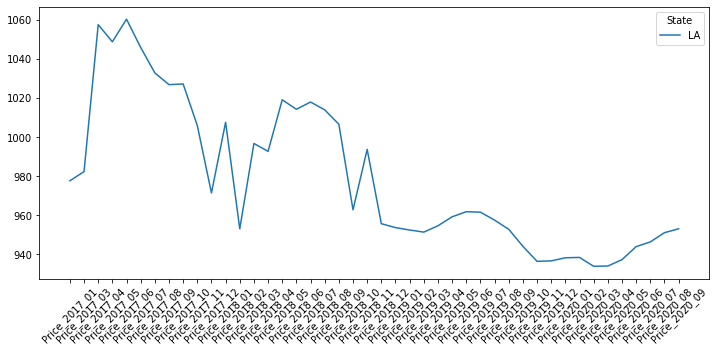

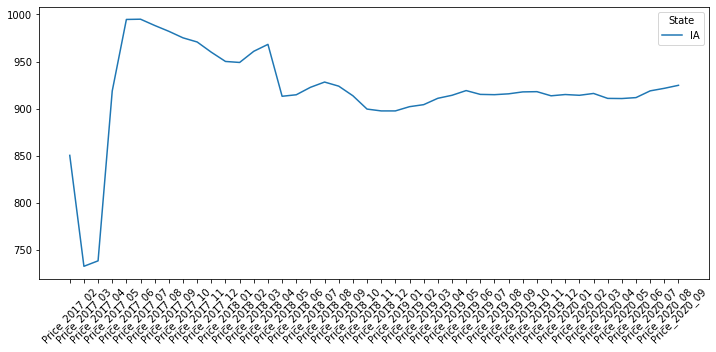

In [115]:
for state in states:
    states_selected = rent[rent['State'].isin([state])]
    state_rents = states_selected.loc[:,:'Price_2020_09'].groupby('State').mean().transpose().dropna()
    dims = (12, 5)
    fig, ax = plt.subplots(figsize=dims)
    chart = sns.lineplot(ax=ax, data=state_rents).set_xticklabels(state_rents.index, rotation=45)


In [60]:
minmax = rent_stats.loc[['min', 'max', 'mean', '25%', '75%']].transpose()

In [61]:
minmax['mid50'] = minmax['75%'] - minmax['25%']
minmax['delta'] = (minmax['max']-minmax['min']) 
minmax['delta_per'] = (minmax['max']-minmax['min'])
/ minmax['mean']

Location
Alabama                  875.693333
Alaska                  1367.243902
Arizona                 1127.004444
Arkansas                 765.435556
California              1849.831111
Colorado                1437.328889
Connecticut             1346.715556
Delaware                1261.233333
District of Columbia    2112.760000
Florida                 1340.035556
Georgia                 1070.462222
Hawaii                  2044.093333
Idaho                    836.222222
Illinois                1107.880000
Indiana                  862.422222
Iowa                     835.631111
Kansas                   878.311111
Kentucky                 851.546667
Louisiana                896.640000
Maine                   1034.245161
Maryland                1530.768889
Massachusetts           1606.511111
Michigan                 938.328889
Minnesota               1140.000000
Mississippi              825.626667
Missouri                 904.720000
Montana                  906.271111
Nebraska           